In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # LaTex font
})

In [47]:
aux = np.load('data/POSTER_example.npz')

In [48]:
x_vector     = aux["x_vector"]
y_vector     = aux["y_vector"]
wMRes_vector = aux["wMRes_vector"]
MRes_vector  = aux["MRes_vector"]
x_QoI        = aux["x_QoI"]

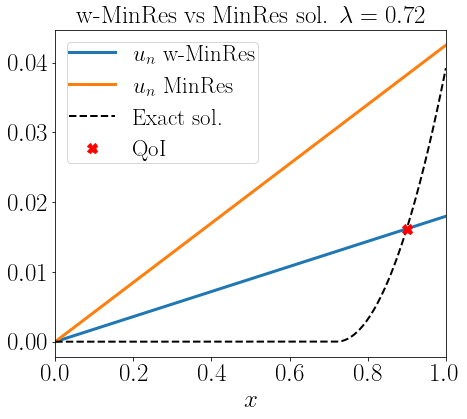

In [68]:
plt.figure(figsize=(7,6))

plt.plot(x_vector,wMRes_vector,
         linewidth=3.0,
         label='$u_n$ w-MinRes')
plt.plot(x_vector,MRes_vector,
          linewidth=3.0,
         label='$u_n$ MinRes')
plt.plot(x_vector,y_vector,
         color='black',
         linewidth=2.0,
         linestyle='--',
         label='Exact sol.')
# QoI computed by hand
plt.plot(x_QoI, (x_QoI - 0.72)**2/2,
         linewidth=4.0,
         marker = 'X',
         markersize =10.0,
         linestyle='',
         color='red',
         label='QoI')
#
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#
plt.xlim(0.,1.)
#plt.ylim(0,None)
#
plt.xlabel('$x$',fontsize=25)
#
plt.title('w-MinRes vs MinRes sol. $\lambda = 0.72$',fontsize=25)
#
plt.legend(fontsize=23, borderpad =0.1)
plt.savefig('Images/ex2_single_POSTER.png', dpi=600, facecolor=None, edgecolor=None,
            orientation='portrait', format='png',transparent=True, 
            bbox_inches='tight', pad_inches=0.1, metadata=None)

In [51]:
aux = np.load('data/ex02_rel_error_12.npz')
lam_vector             = aux['lam_train']
rel_error_vector_train = aux['train_error']
lam_vector_test_np     = aux['lam_test']
rel_error_vector_wMRes = aux['test_error_w']
rel_error_vector_MRes  = aux['test_error']

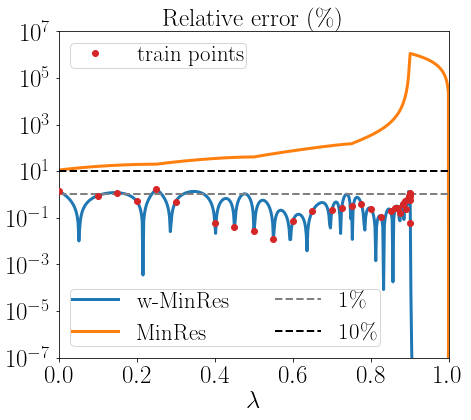

In [82]:
fig, ax = plt.subplots(figsize=(7,6))
line1, = plt.semilogy(lam_vector_test_np,rel_error_vector_wMRes,
         label='w-MinRes',
         color='tab:blue',
         linewidth=3.0)


line2, = plt.semilogy(lam_vector_test_np,rel_error_vector_MRes,
                      label='MinRes',
                      color='tab:orange',
                      linewidth=3.0)

line3, = plt.semilogy(lam_vector,rel_error_vector_train,
                      marker='o',
                      linestyle='',
                      color='tab:red',
                      label = 'train points',
                      #clip_on=False,
                      zorder=3,
                      linewidth=3.0)

line4, = plt.semilogy(lam_vector_test_np,np.ones(lam_vector_test_np.shape),
                      label='1\%',
                      color='gray',
                      linestyle='--',
                      linewidth=2.0)
line5, = plt.semilogy(lam_vector_test_np,10*np.ones(lam_vector_test_np.shape),
                      label='10\%',
                      color='black',
                      linestyle='--',
                      linewidth=2.0)
#
plt.xlabel(r'$\lambda$',fontsize=25)
#
# LEGEND COMMNANDS
first_legend = plt.legend(handles=[line1,line2,line4, line5], fontsize=23,loc='lower left', ncol=2, borderpad =0.1)
plt.gca().add_artist(first_legend)
plt.legend(handles=[line3], loc='upper left', fontsize=23, borderpad =0.1)
#
plt.title('Relative error (\%)',fontsize=25)
#
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#
plt.xlim(0.,1.)
plt.ylim(1e-7,1e7)
# H
plt.savefig('Images/ex2_rel_error_v2_latex_12_POSTER_v2.png', dpi=600, facecolor=None, edgecolor=None,
            orientation='portrait', format='png',transparent=True, 
            bbox_inches='tight', pad_inches=0.1, metadata=None)